# Overview
This notebook contains my work for using regression in predicting horsepower.

# Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

import wrangle
import model

# MVP
First up is the MVP. I'm only using boost PSI and fuel octane as features here. Next iterations will include more features from the car_info.csv 'specs' column.

## Preparation

In [2]:
# acquire, prep, split, and scale data for modeling
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.prep_model_MVP()

In [3]:
# check work
X_validate

array([[0.06685237, 0.1       ],
       [0.09749304, 0.1       ],
       [0.05571031, 0.2       ],
       ...,
       [0.05849582, 0.1       ],
       [0.08077994, 0.1       ],
       [0.07799443, 0.15      ]])

## Generating Predictions

In [4]:
# build, fit model
lm = LinearRegression(normalize=True).fit(X_train, y_train)

In [5]:
# generate model predictions
train_preds = pd.DataFrame(lm.predict(X_train), columns=['OLS'])
validate_preds = pd.DataFrame(lm.predict(X_validate), columns=['OLS'])
# generate mean baseline
baseline = y_train.mean()
train_preds['baseline'] = baseline
validate_preds['baseline'] = baseline

In [6]:
train_preds.head()

,OLS,baseline
0,303.562574,328.526646
1,406.822696,328.526646
2,309.399283,328.526646
3,321.072701,328.526646
4,321.072701,328.526646


In [7]:
validate_preds.head()

,OLS,baseline
0,311.588049,328.526646
1,319.613523,328.526646
2,322.310979,328.526646
3,307.940105,328.526646
4,415.577759,328.526646


## Evaluation of Ordinary Least Squares (OLS) Model
### Residuals

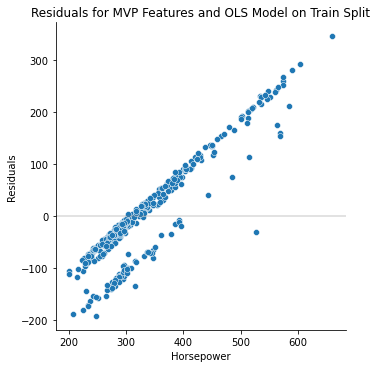

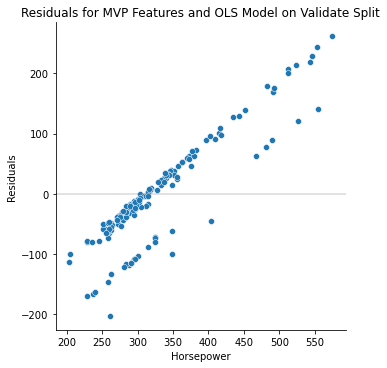

In [8]:
# calculate residuals
train_preds['residuals'] = y_train - train_preds['OLS']
validate_preds['residuals'] = y_validate - validate_preds['OLS']

# plot residuals for train split
sns.relplot(x=y_train, y=train_preds['residuals'])
plt.title('Residuals for MVP Features and OLS Model on Train Split')
plt.axhline(y=0, c='gray', alpha=.3)
plt.xlabel('Horsepower')
plt.ylabel('Residuals')
plt.show()

# plot residuals for validate split
sns.relplot(x=y_validate, y=validate_preds['residuals'])
plt.title('Residuals for MVP Features and OLS Model on Validate Split')
plt.axhline(y=0, c='gray', alpha=.3)
plt.xlabel('Horsepower')
plt.ylabel('Residuals')
plt.show()

As you can see, boost PSI and fuel octane do not tell the whole story of a car's horsepower. Once we've completed the MVP, we can dig deeper into feature engineering to reduce these residuals.

### RMSE and Other Error Metrics
**Train Split Metrics**

In [9]:
# OLS train SSE, ESS, TSS, MSE, RMSE
train_sse = round(mean_squared_error(y_train, train_preds['OLS']) * len(y_train), 2)
train_ess = round(sum((train_preds['OLS'] - y_train.mean())**2), 2)
train_tss = round(train_ess + train_sse, 2)
train_mse = round(mean_squared_error(y_train, train_preds['OLS']), 2)
train_rmse = round(train_mse ** 0.5, 2)

print('Sum of Squared Errors (SSE):', train_sse)
print('Explained Sum of Squares (ESS):', train_ess)
print('Total Sum of Squares (TSS):', train_tss)
print('Mean Squared Error (MSE):', train_mse)
print('Root Mean Squared Error (RMSE):', train_rmse)

Sum of Squared Errors (SSE): 8721778.89
Explained Sum of Squares (ESS): 1599328.01
Total Sum of Squares (TSS): 10321106.9
Mean Squared Error (MSE): 6617.43
Root Mean Squared Error (RMSE): 81.35


**Validate Split Metrics**

In [10]:
# baseline error on validate split
baseline_sse = round(mean_squared_error(y_validate, validate_preds['baseline']) * len(y_validate), 2)
baseline_ess = round(sum((validate_preds['baseline'] - y_validate.mean())**2), 2)
baseline_tss = round(baseline_ess + baseline_sse, 2)
baseline_mse = round(mean_squared_error(y_validate, validate_preds['baseline']), 2)
baseline_rmse = round(baseline_mse ** 0.5, 2)

# OLS validate SSE, ESS, TSS, MSE, RMSE
validate_sse = round(mean_squared_error(y_validate, validate_preds['OLS']) * len(y_validate), 2)
validate_ess = round(sum((validate_preds['OLS'] - y_validate.mean())**2), 2)
validate_tss = round(validate_ess + validate_sse, 2)
validate_mse = round(mean_squared_error(y_validate, validate_preds['OLS']), 2)
validate_rmse = round(validate_mse ** 0.5, 2)

In [11]:
# print baseline errors for validate split
print('------- Baseline on Validate - Errors -------')
print('Sum of Squared Errors (SSE):', baseline_sse)
print('Explained Sum of Squares (ESS):', baseline_ess)
print('Total Sum of Squares (TSS):', baseline_tss)
print('Mean Squared Error (MSE):', baseline_mse)
print('Root Mean Squared Error (RMSE):', baseline_rmse)

# print OLS errors for validate split
print('------- OLS on Validate - Errors --------')
print('Sum of Squared Errors (SSE):', validate_sse)
print('Explained Sum of Squares (ESS):', validate_ess)
print('Total Sum of Squares (TSS):', validate_tss)
print('Mean Squared Error (MSE):', validate_mse)
print('Root Mean Squared Error (RMSE):', validate_rmse)

------- Baseline on Validate - Errors -------
Sum of Squared Errors (SSE): 6381829.61
Explained Sum of Squares (ESS): 51444.47
Total Sum of Squares (TSS): 6433274.08
Mean Squared Error (MSE): 8057.87
Root Mean Squared Error (RMSE): 89.77
------- OLS on Validate - Errors --------
Sum of Squared Errors (SSE): 5217891.75
Explained Sum of Squares (ESS): 1015106.68
Total Sum of Squares (TSS): 6232998.43
Mean Squared Error (MSE): 6588.25
Root Mean Squared Error (RMSE): 81.17


### R^2 Explained Variance Score
**Train Split Explained Variance**

In [12]:
# OLS train r2
train_r2 = train_ess / train_tss
print('R-squared = ',round(train_r2,3))
print("Percent of variance in y explained by x = ", round(train_r2*100,1), "%")

R-squared =  0.155
Percent of variance in y explained by x =  15.5 %


**Validate Split Explained Variance**

In [13]:
# baseline validate r2
baseline_r2 = baseline_ess / baseline_tss
print('R-squared = ',round(baseline_r2, 3))
print("Percent of variance in y explained by x = ", round(baseline_r2 * 100, 1), "%")

R-squared =  0.008
Percent of variance in y explained by x =  0.8 %


In [14]:
# OLS validate r2
validate_r2 = validate_ess / validate_tss
print('R-squared = ',round(validate_r2, 3))
print("Percent of variance in y explained by x = ", round(validate_r2 * 100, 1), "%")

R-squared =  0.163
Percent of variance in y explained by x =  16.3 %


## MVP Takeaways
- Using only the boost PSI and fuel octane of each car, our OLS model:
    * Had an RMSE of 81 horsepower (Baseline: 90 horsepower)
    * Had an explained variance of 16% (Baseline: 1%)

**Therefore, our OLS model performed significantly better than the baseline.**

In next iterations, we will add more features and models to try to improve our predictions.